In [213]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
dataset = pd.read_csv(
    "F:/Data_Science/FIFA 2018 Statistics.csv",
    header = 0
)

In [215]:
dataset.drop(['Date'], inplace=True, axis=1)

datasetFilled = dataset.fillna(0)
datasetFilled['1st Goal'].astype(int)

sortedset = datasetFilled.sort_values(['Team','Man of the Match'])
sortedset

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
10,Argentina,Iceland,1,72,26,7,9,10,10,0,...,0,0,0,No,19.0,Group Stage,No,0,0.0,0.0
44,Argentina,Croatia,0,58,10,3,3,4,5,3,...,3,0,0,No,0.0,Group Stage,No,0,0.0,0.0
97,Argentina,France,3,59,9,4,1,4,4,1,...,5,0,0,No,41.0,Round of 16,No,0,0.0,0.0
77,Argentina,Nigeria,2,66,8,4,3,1,5,2,...,3,0,0,Yes,14.0,Group Stage,No,0,0.0,0.0
9,Australia,France,1,49,4,1,2,1,1,0,...,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0
41,Australia,Denmark,1,51,14,5,5,4,5,0,...,0,0,0,No,38.0,Group Stage,No,0,0.0,0.0
74,Australia,Peru,0,53,14,2,7,5,8,3,...,4,0,0,No,0.0,Group Stage,No,0,0.0,0.0
121,Belgium,France,0,60,9,3,5,1,5,1,...,3,0,0,No,0.0,Semi- Finals,No,0,0.0,0.0
24,Belgium,Panama,3,61,15,6,7,2,9,1,...,3,0,0,Yes,47.0,Group Stage,No,0,0.0,0.0
52,Belgium,Tunisia,5,52,23,12,8,3,5,3,...,0,0,0,Yes,6.0,Group Stage,No,0,0.0,0.0


In [216]:
world_cup_teams = [
    'Russia',
    'Saudi Arabia',
    'Egypt',
    'Uruguay',
    'Morocco',
    'Iran',
    'Portugal',
    'Spain',
    'France',
    'Australia',
    'Argentina',
    'Iceland',
    'Peru',
    'Denmark',
    'Croatia',
    'Nigeria',
    'Costa Rica',
    'Serbia',
    'Germany',
    'Mexico',
    'Brazil',
    'Switzerland',
    'Sweden',
    'Korea Republic',
    'Belgium',
    'Panama',
    'Tunisia',
    'England',
    'Colombia',
    'Japan',
    'Poland',
    'Senegal',
]    

# Plotting Attempts vs Matches Won

More the attempts a team does for shooting a goal, the more are the chances of the goal actually being scored. Thus there is an very direct expected correlation between Attempts and Match Winning

Attempts vs Matches Won


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


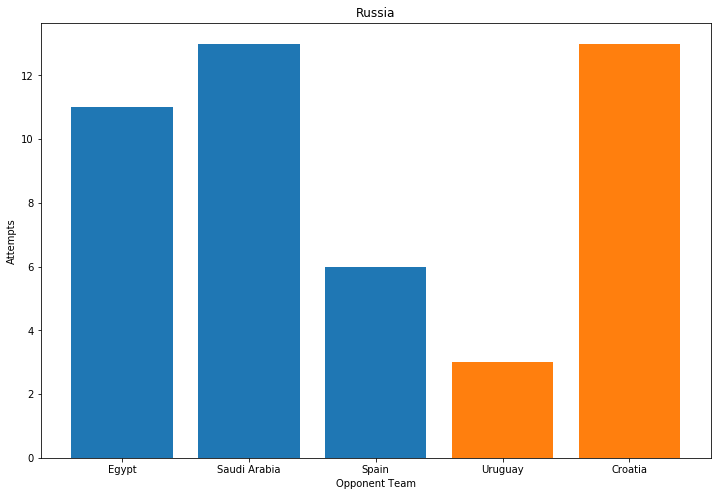

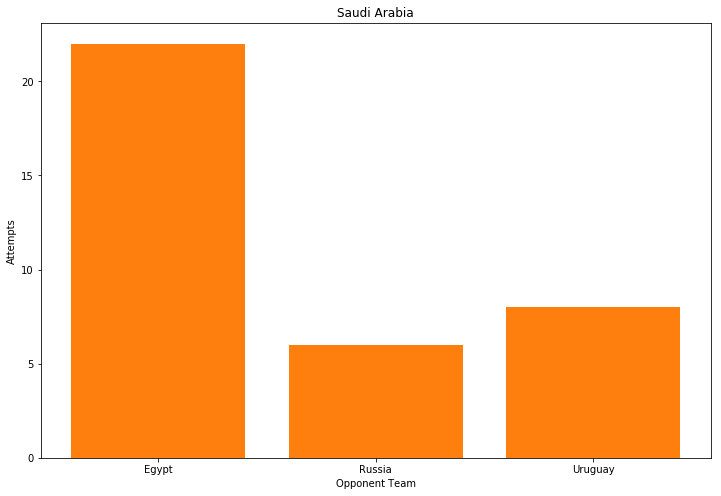

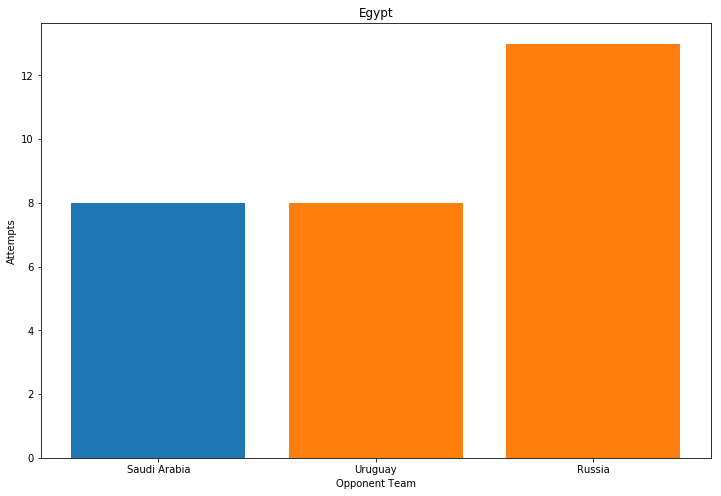

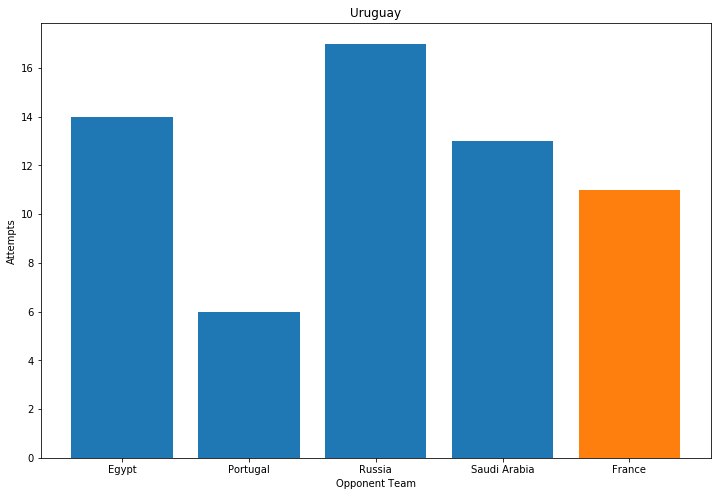

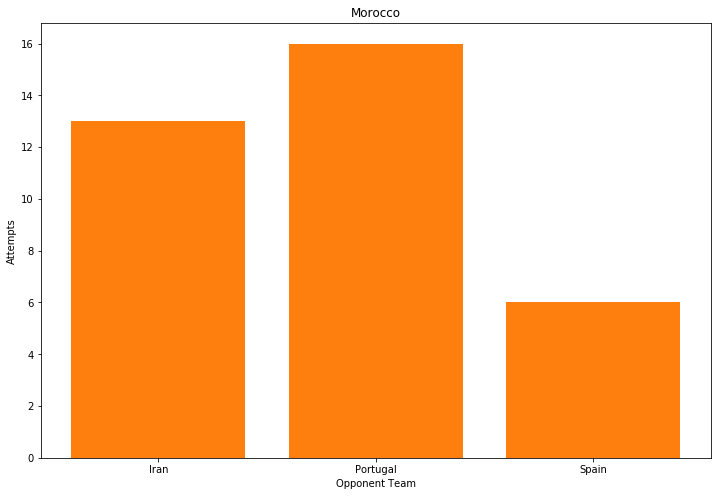

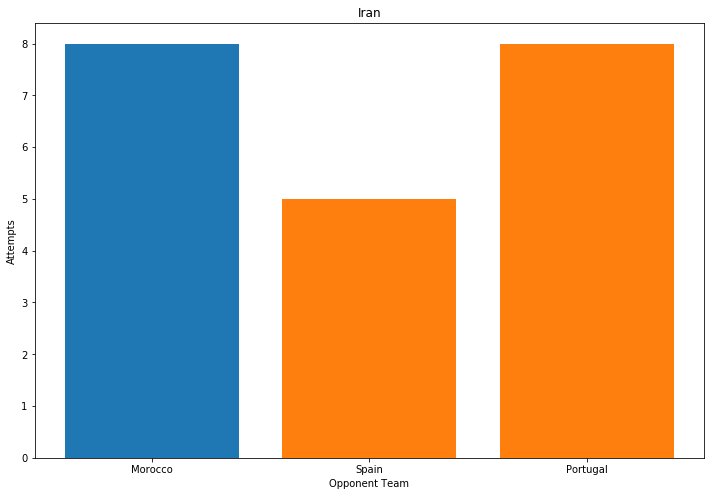

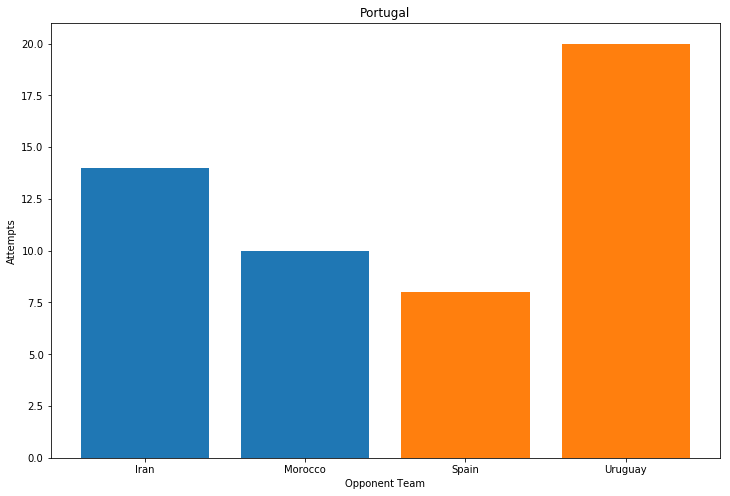

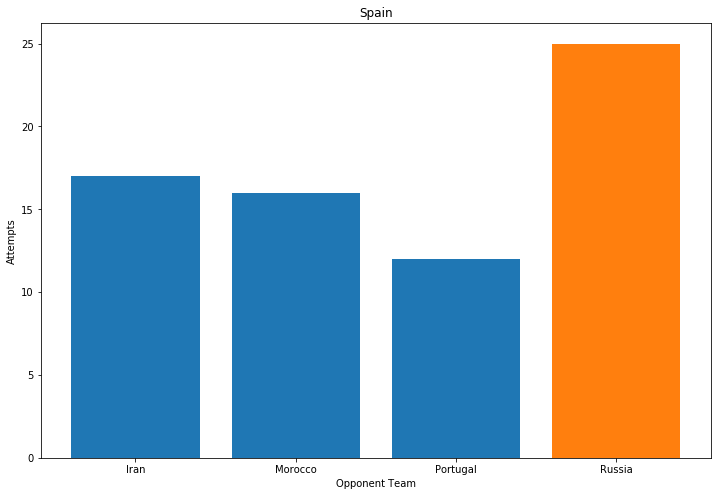

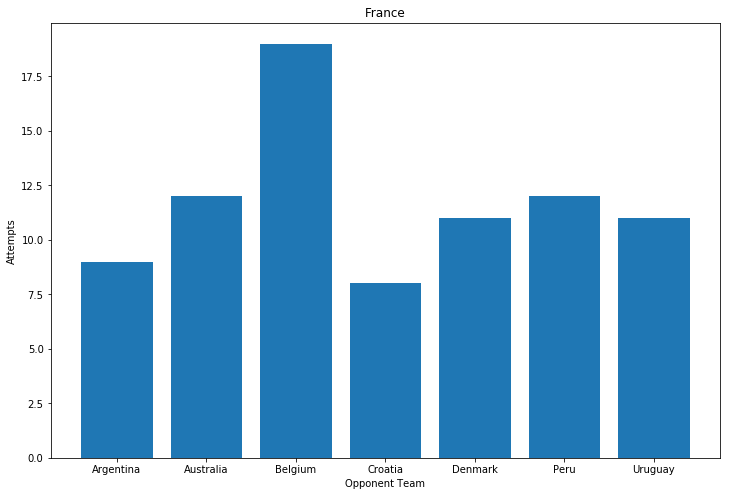

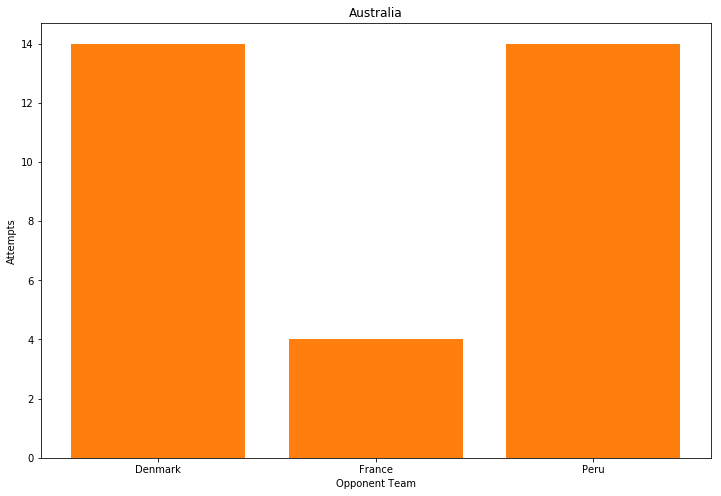

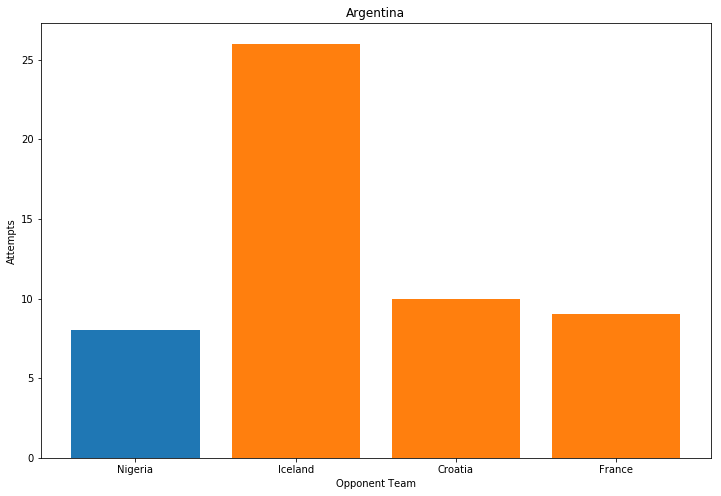

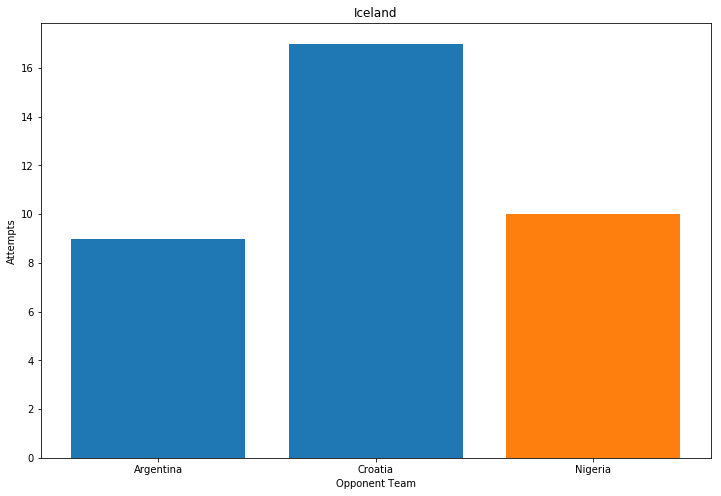

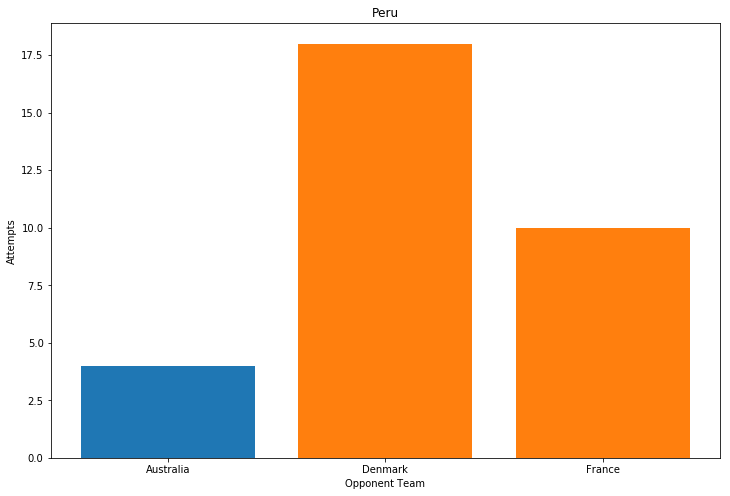

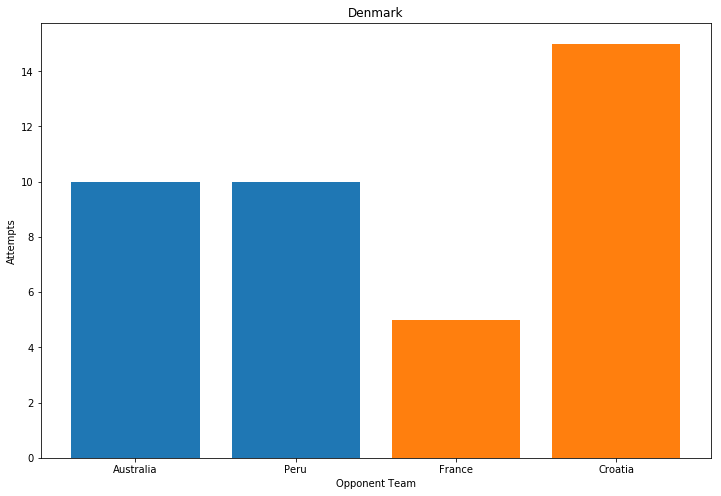

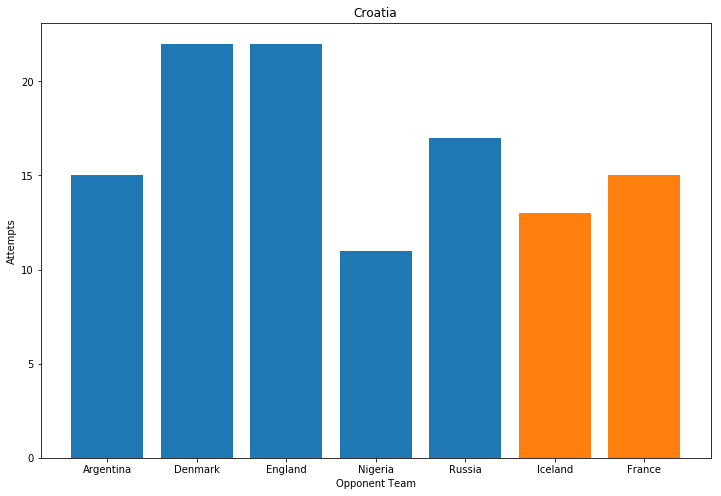

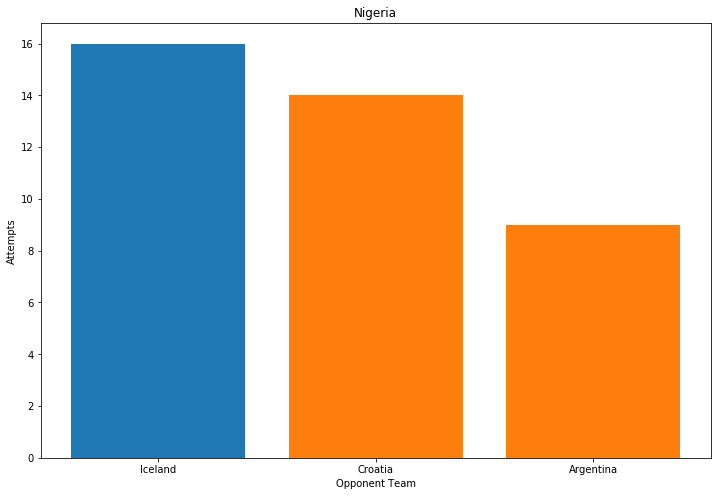

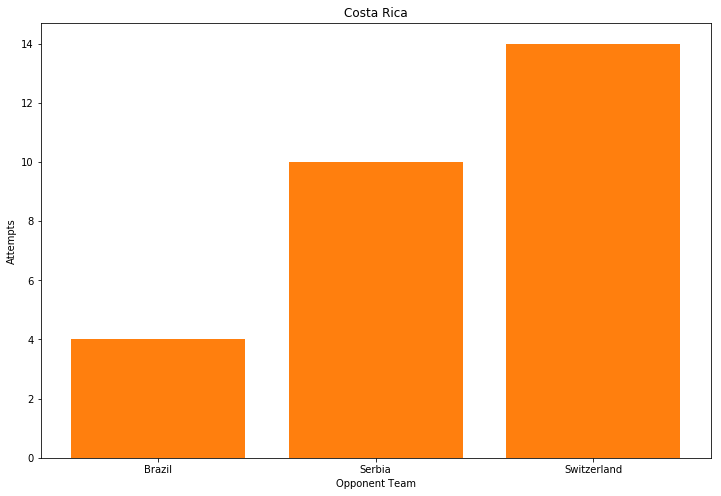

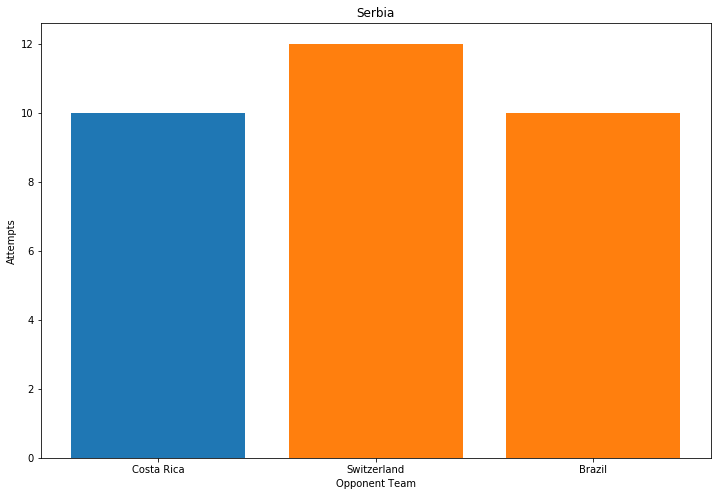

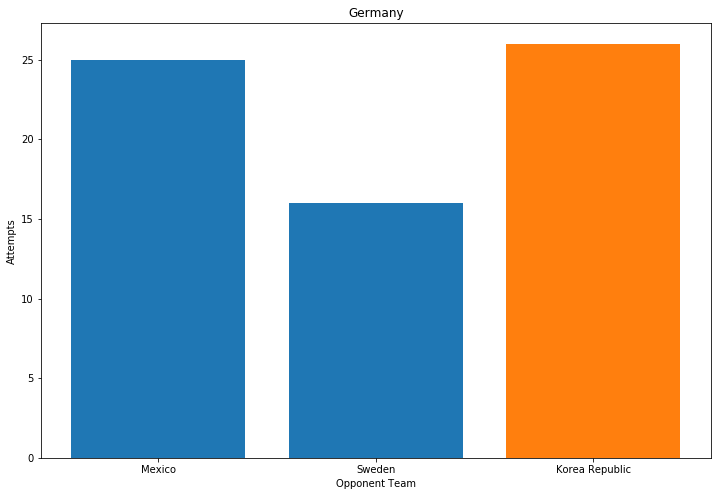

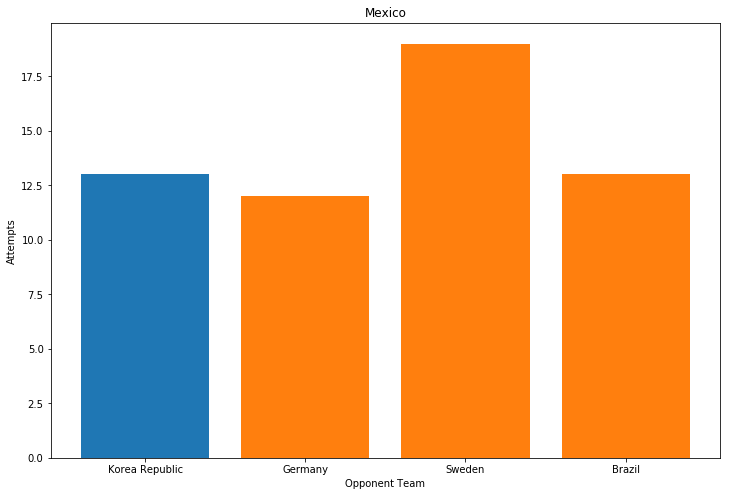

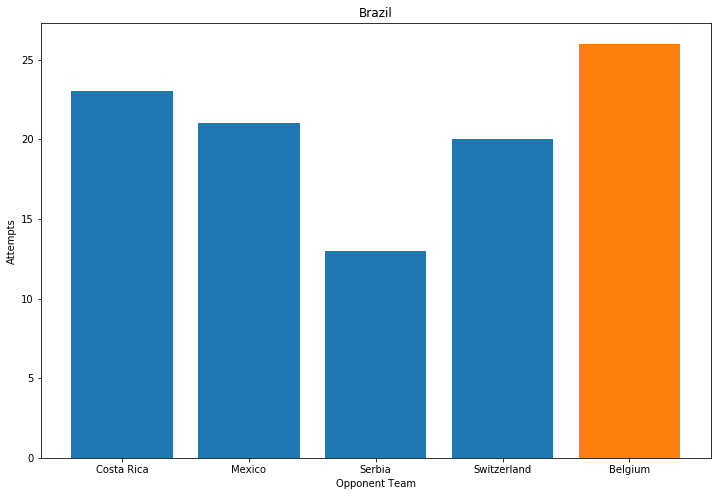

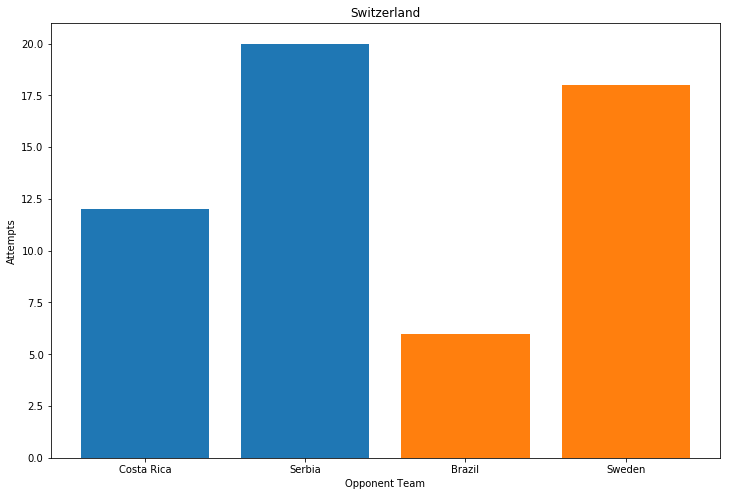

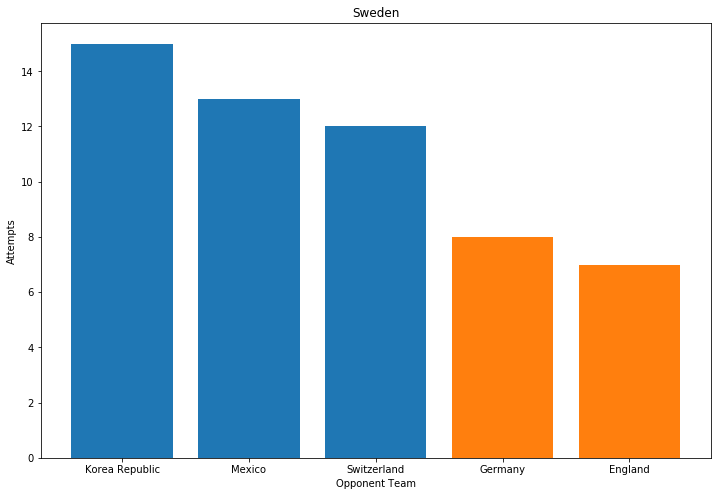

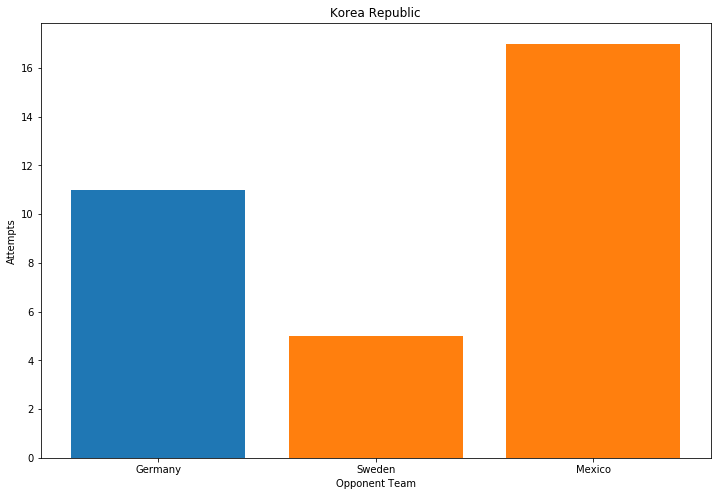

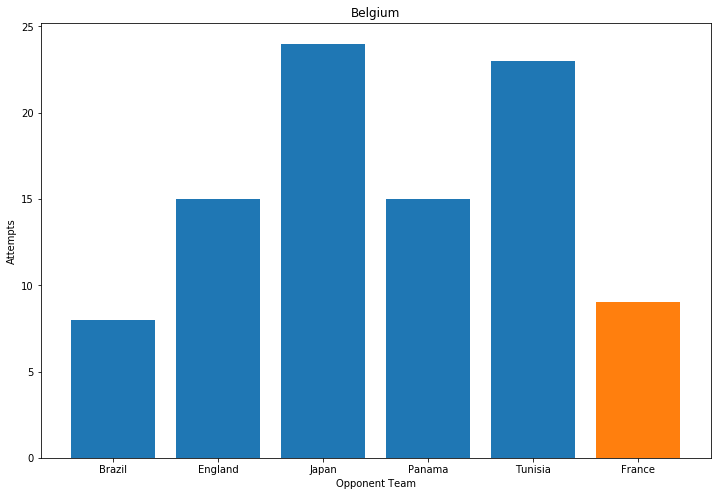

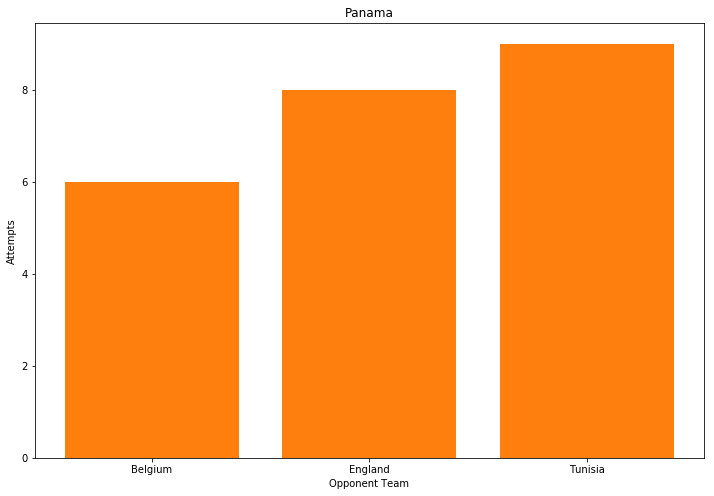

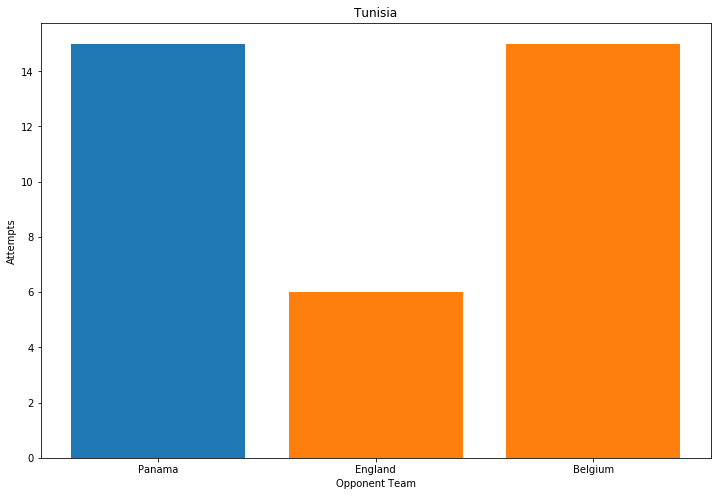

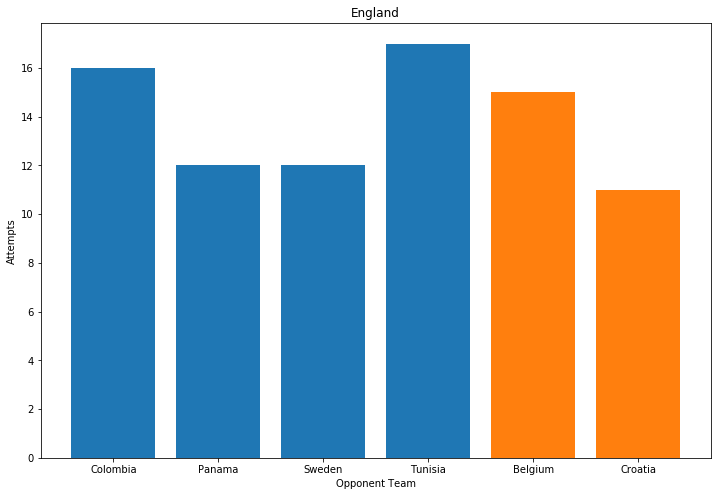

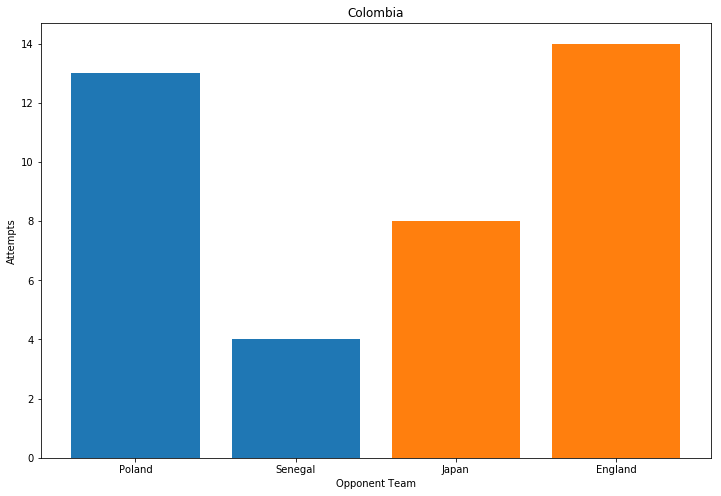

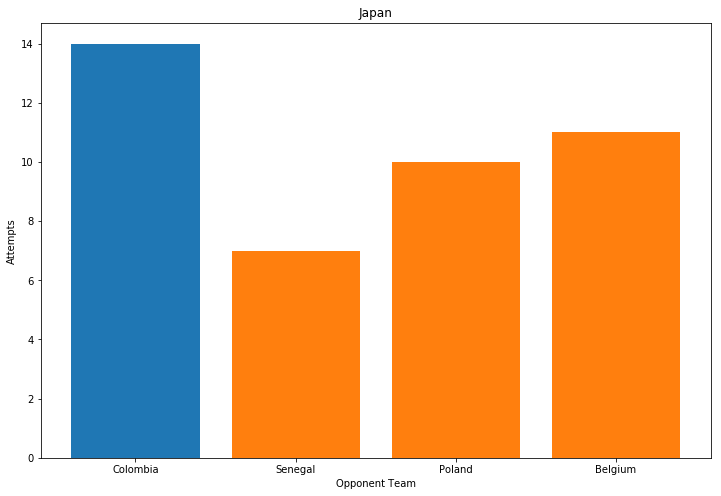

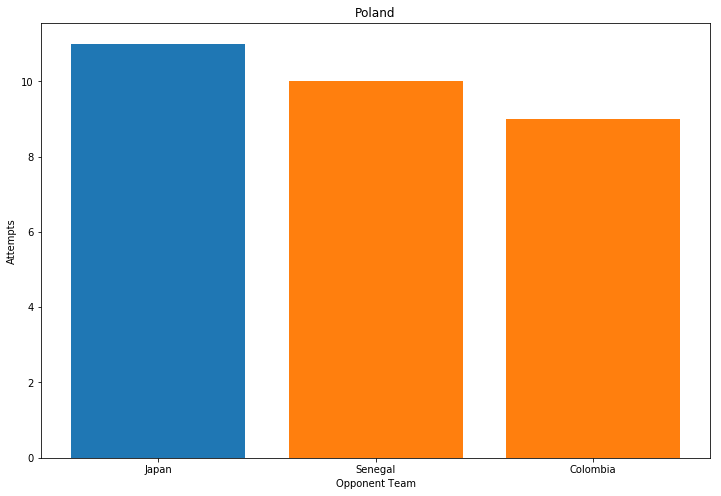

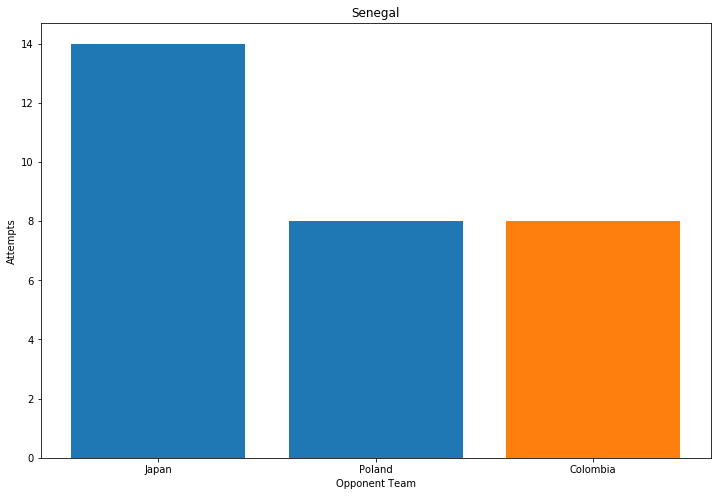

In [217]:
print("Attempts vs Matches Won")

for item in world_cup_teams:

    dataPlot = datasetFilled.where(datasetFilled['Team']==item).dropna()

    won = dataPlot[dataPlot['Man of the Match'].isin(['Yes'])]
    lost = dataPlot[dataPlot['Man of the Match'].isin(['No'])]

    fig, ax = plt.subplots(figsize=(12,8))  
    ax.bar(won['Opponent'],won['Attempts'],label="Man of the Match")  
    ax.bar(lost['Opponent'],lost['Attempts'],label="Lost Games")
    #ax.legend()
    plt.title(item)
    ax.set_xlabel('Opponent Team')  
    ax.set_ylabel('Attempts')

In [218]:
plt.close()

# Plotting Pass Accuracy vs Matches Won

It is expected that with higher passing accuracy, the game ends up being smoother for the particular team with higher accuracy. Thus a higher chance of that team making a win off of it.

Pass Accuracy vs Matches Won


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


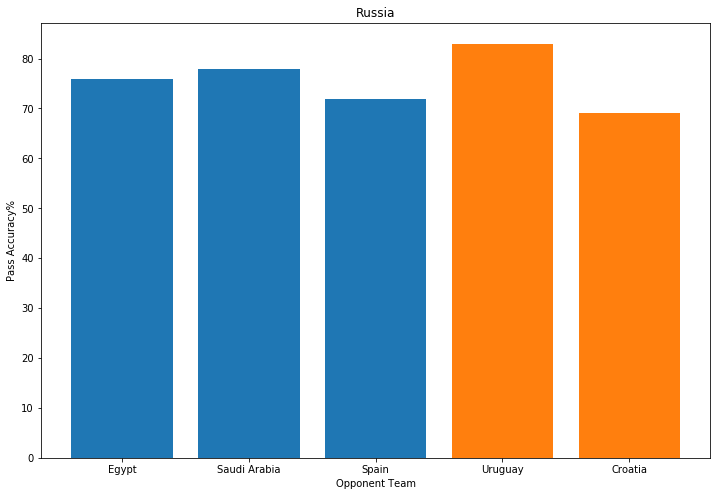

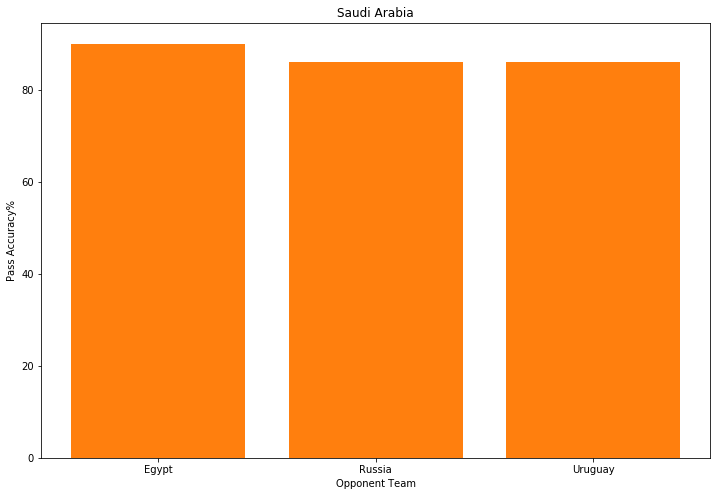

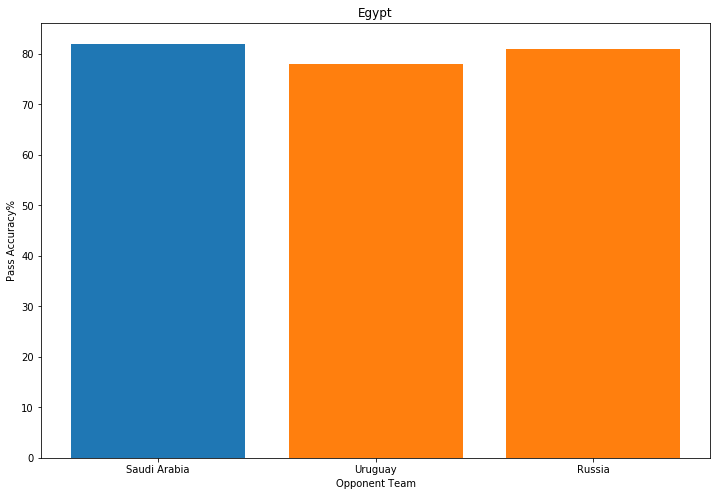

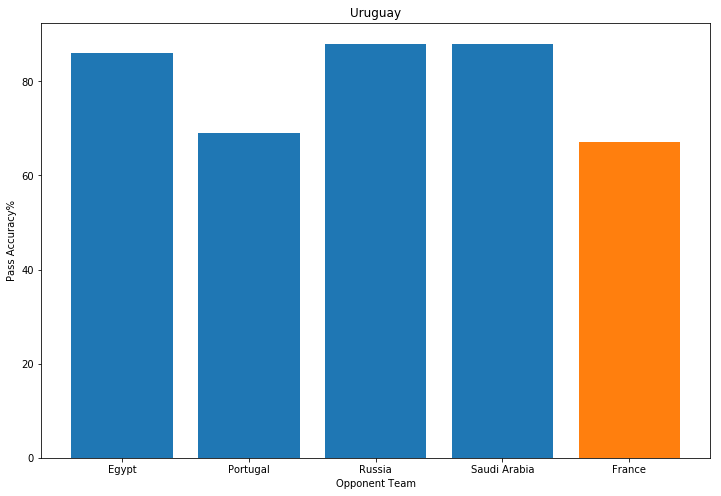

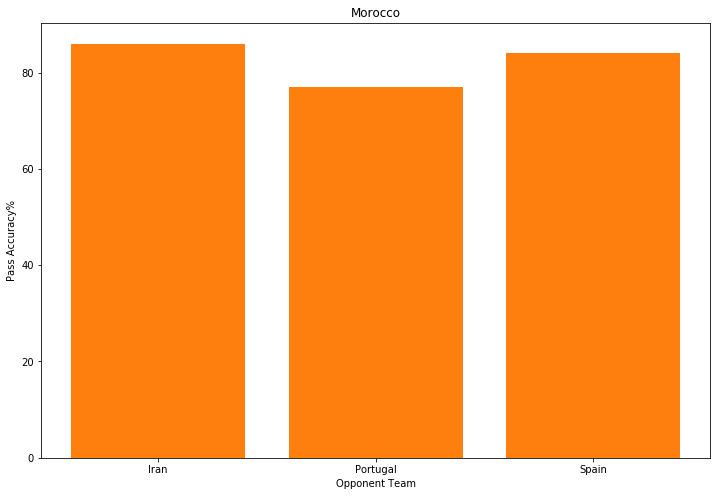

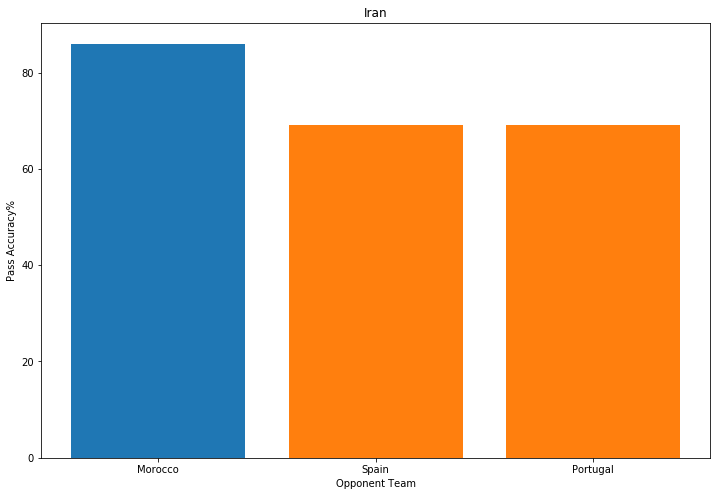

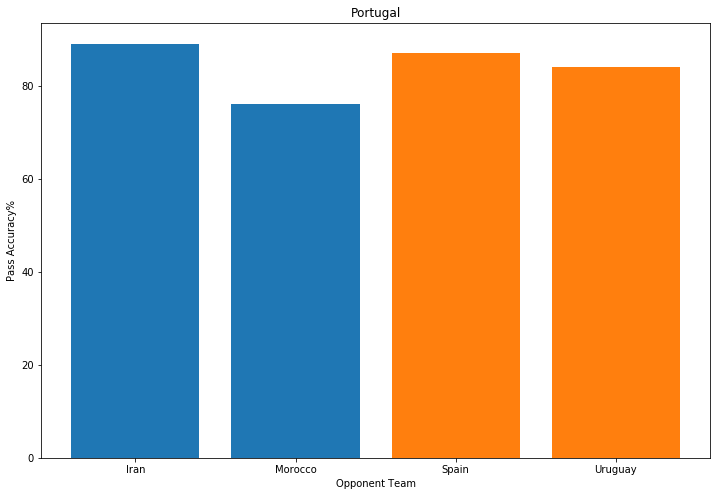

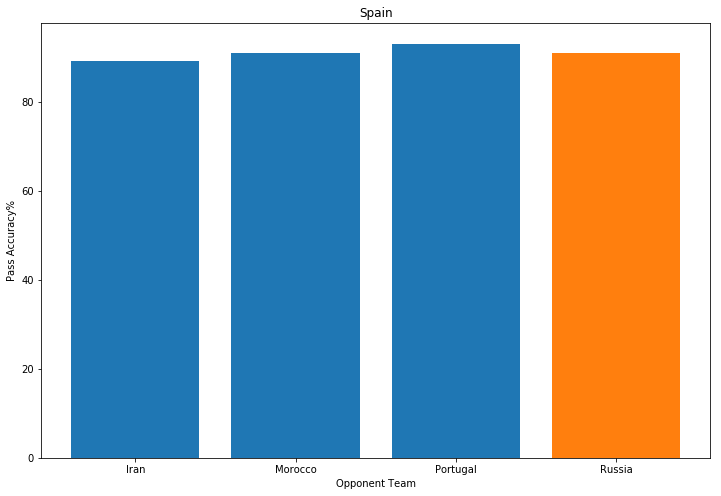

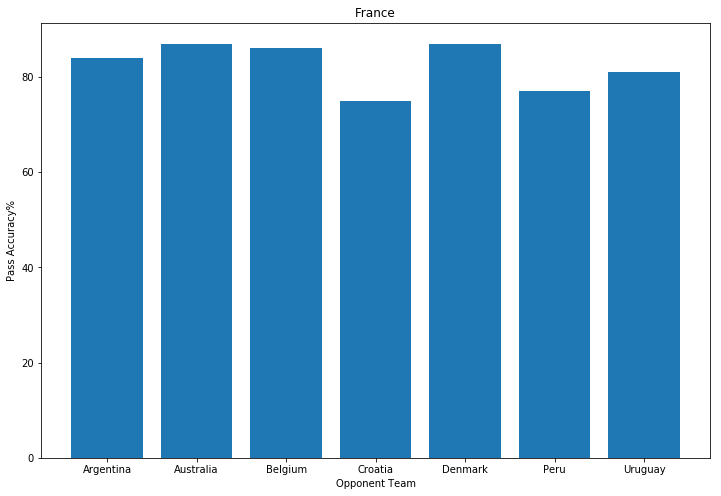

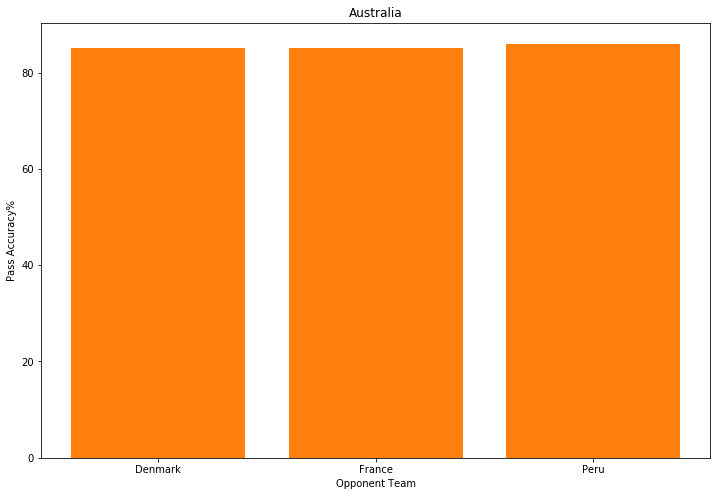

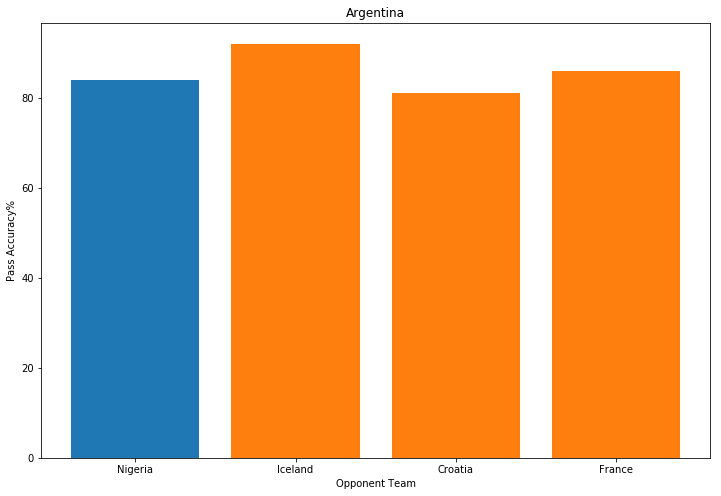

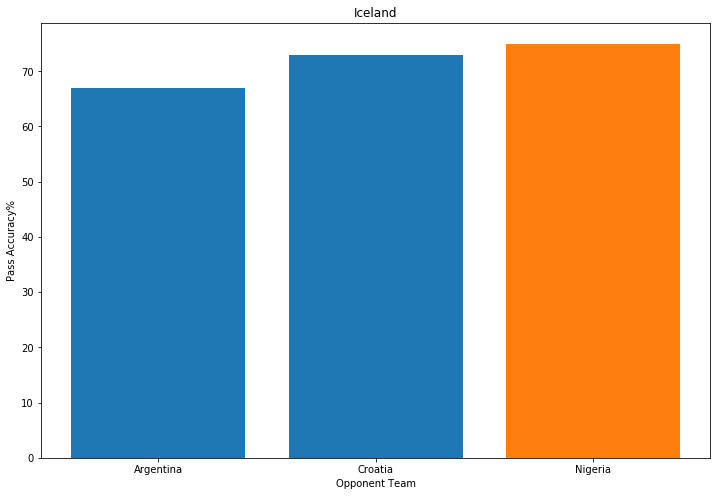

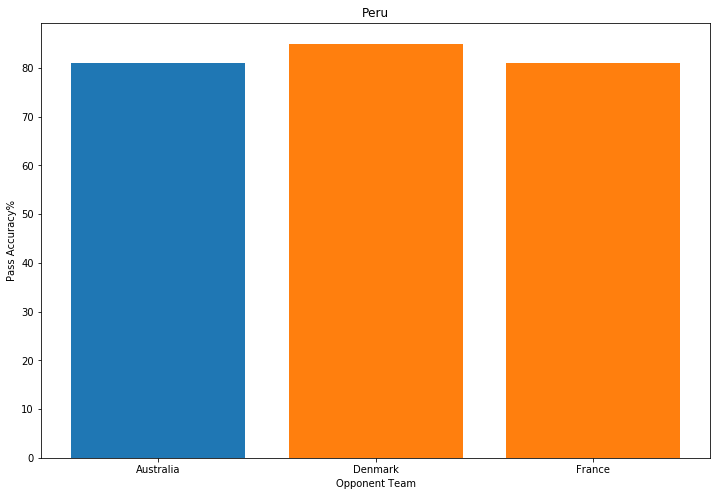

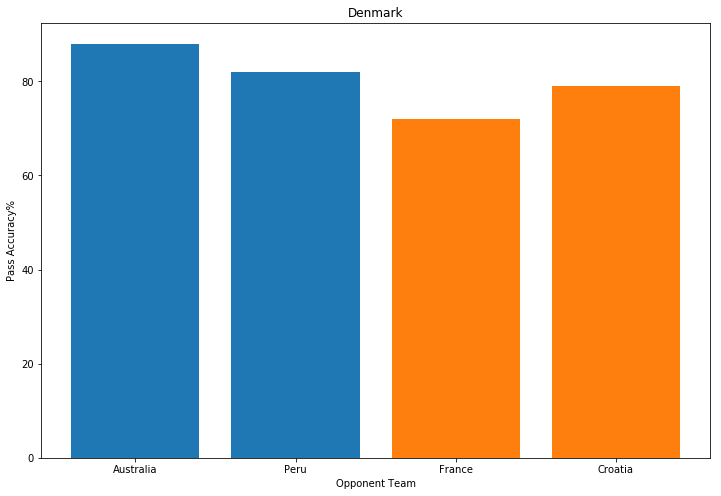

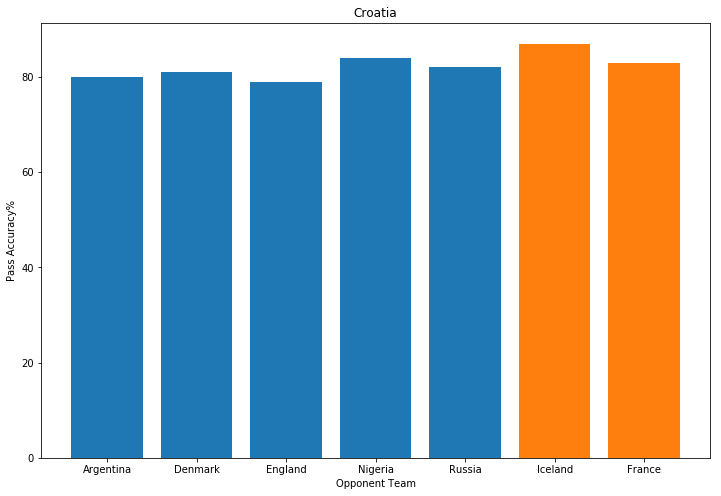

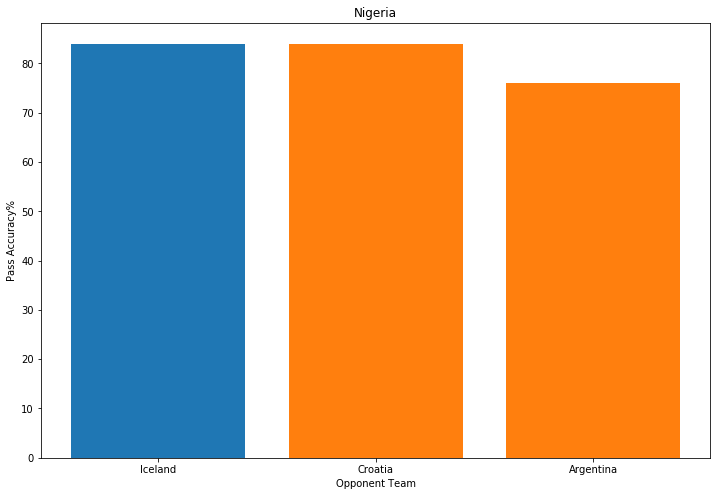

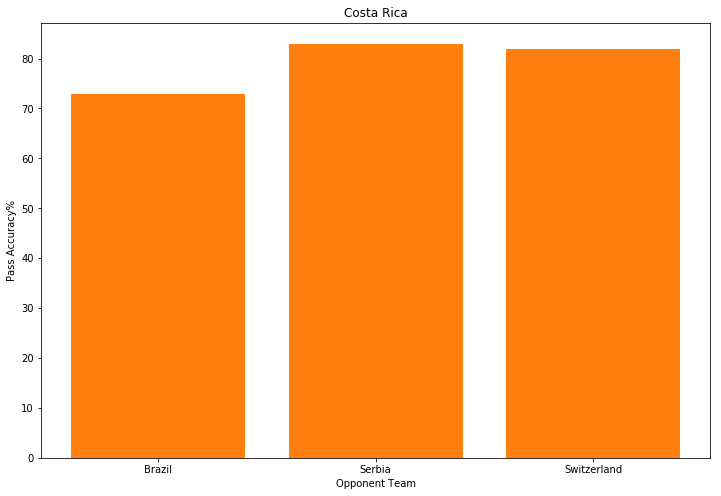

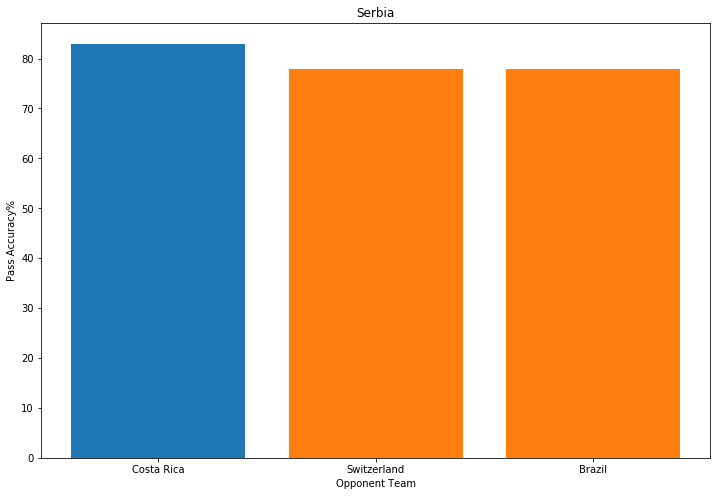

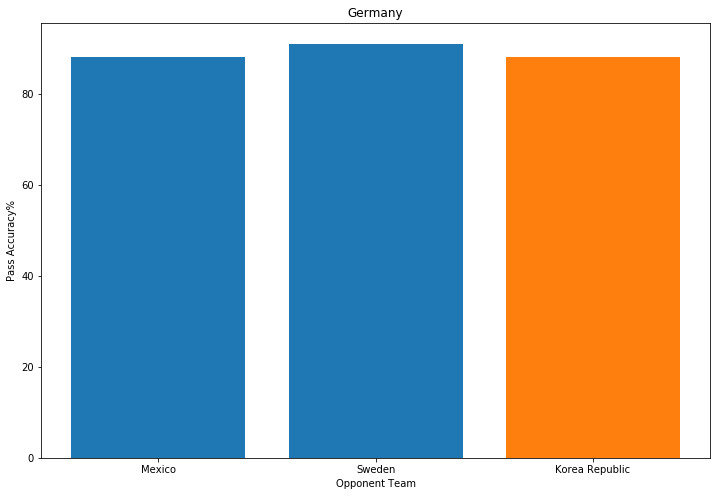

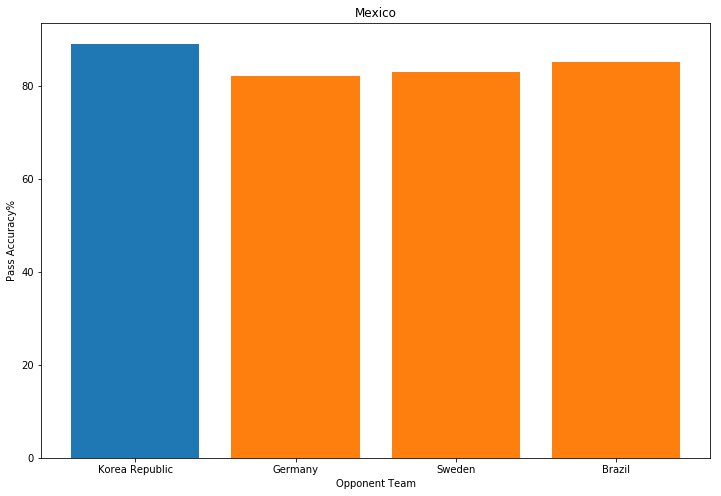

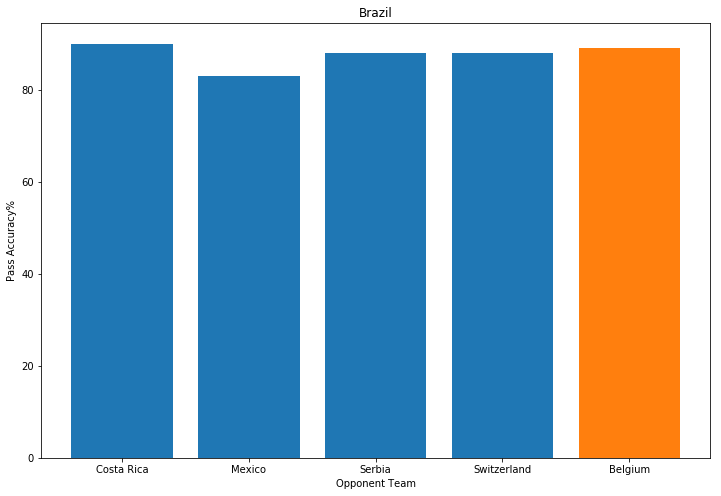

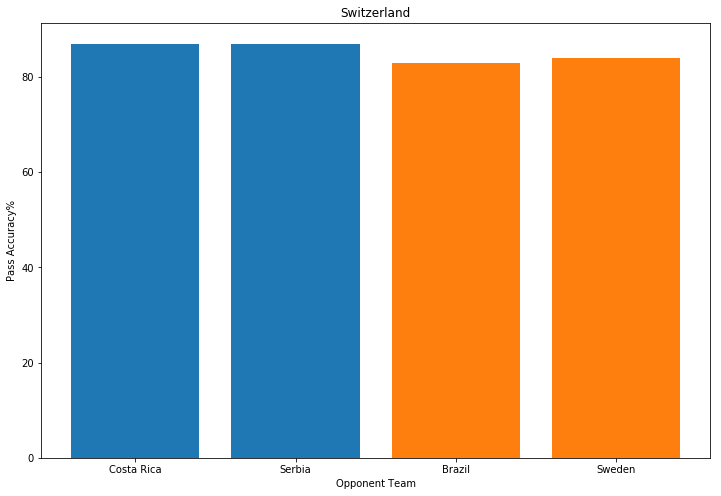

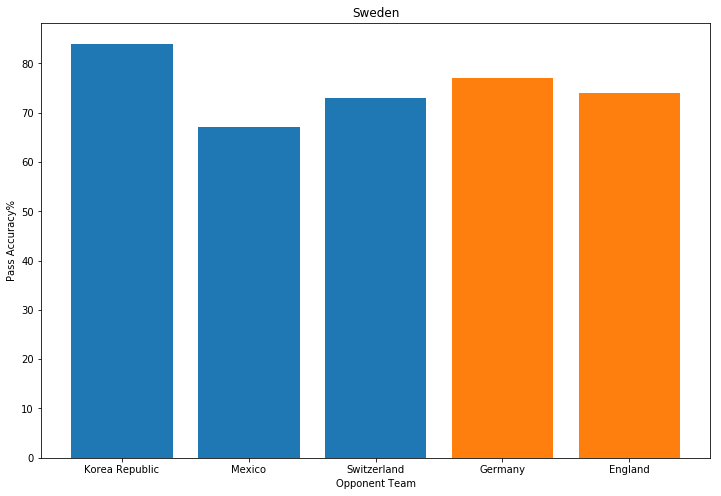

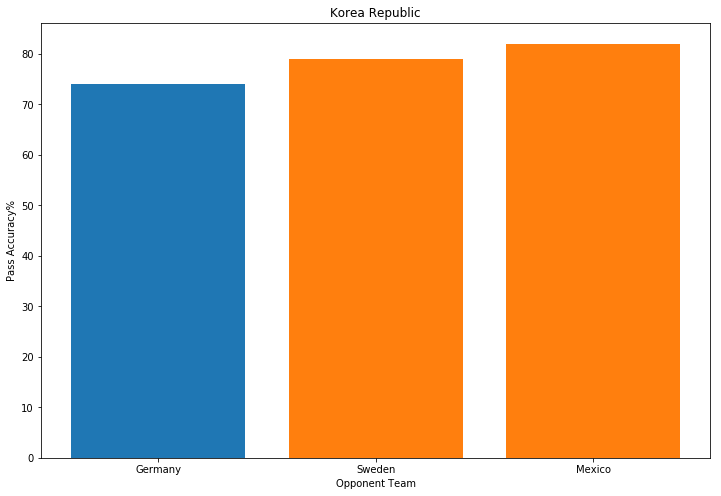

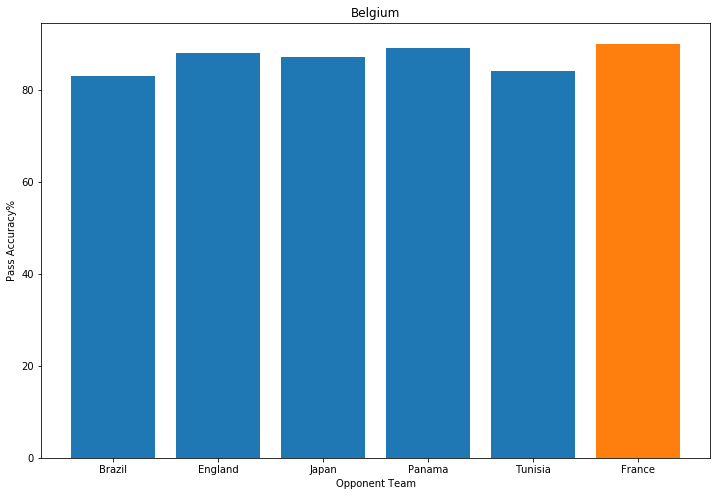

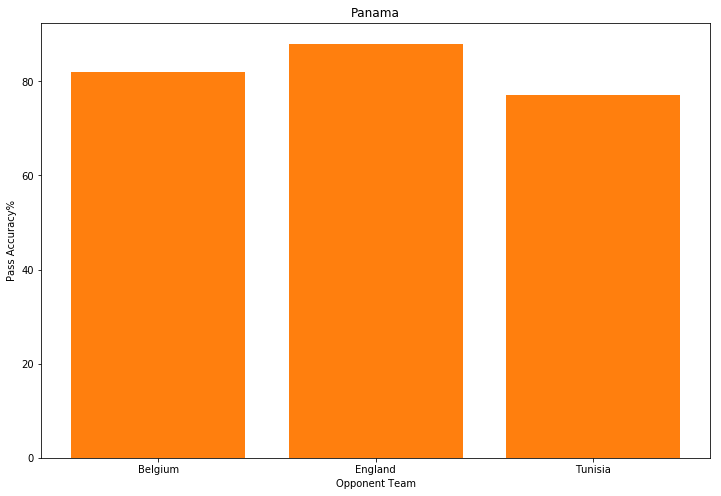

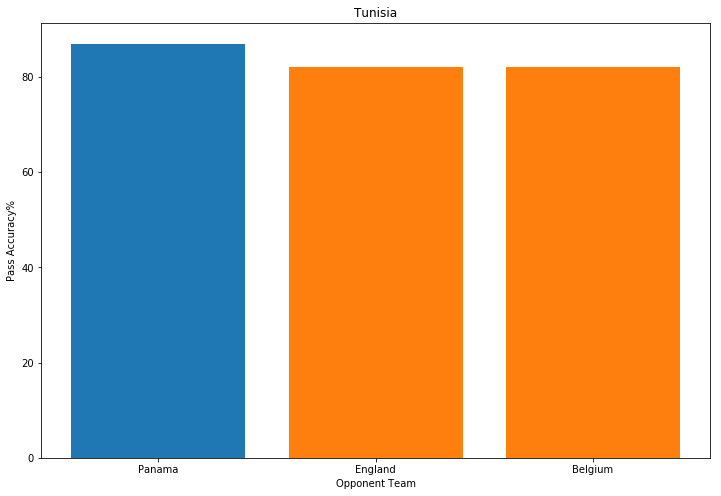

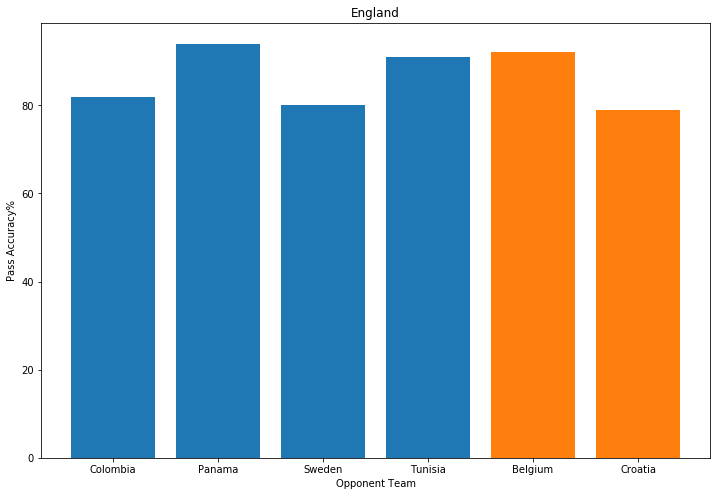

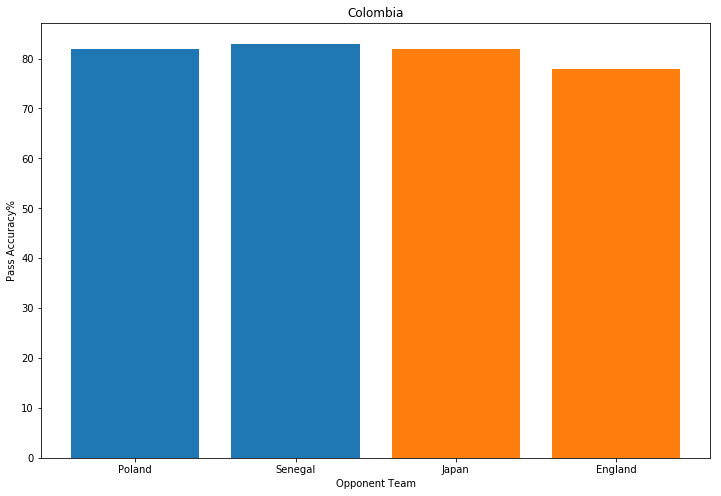

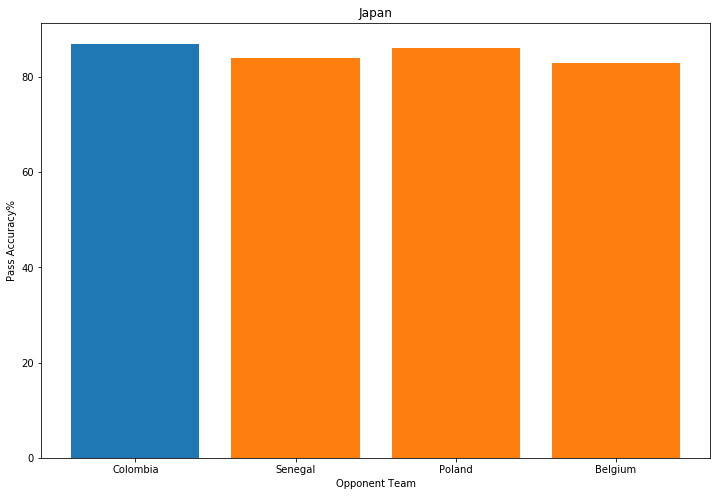

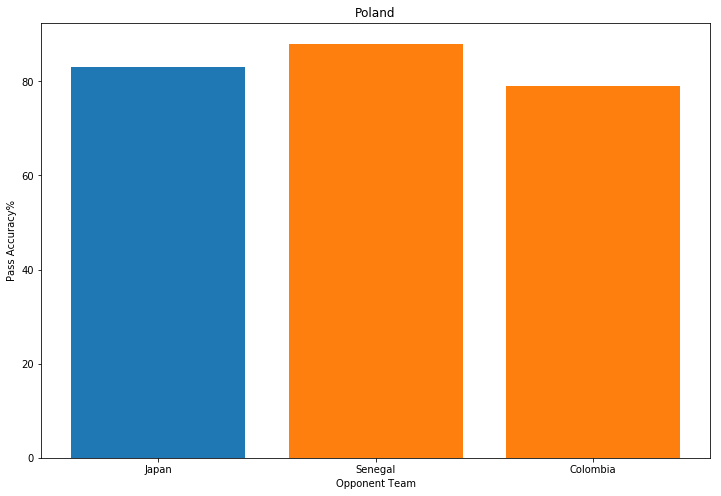

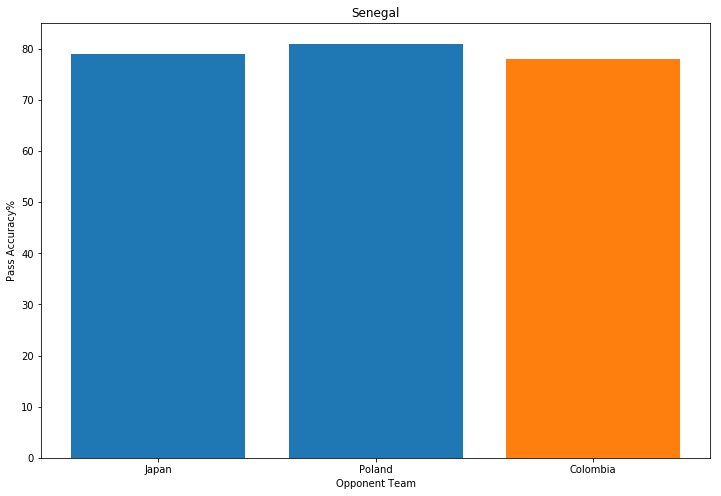

In [219]:
print("Pass Accuracy vs Matches Won")

for item in world_cup_teams:

    dataPlot = datasetFilled.where(datasetFilled['Team']==item).dropna()

    won = dataPlot[dataPlot['Man of the Match'].isin(['Yes'])]
    lost = dataPlot[dataPlot['Man of the Match'].isin(['No'])]

    fig, ax = plt.subplots(figsize=(12,8))  
    ax.bar(won['Opponent'],won['Pass Accuracy %'],label="Man of the Match")  
    ax.bar(lost['Opponent'],lost['Pass Accuracy %'],label="Lost Games")  
    #ax.legend()
    plt.title(item)
    ax.set_xlabel('Opponent Team')  
    ax.set_ylabel('Pass Accuracy%')

In [220]:
plt.close()

Text(0,0.5,'Average 1st Goal Time')

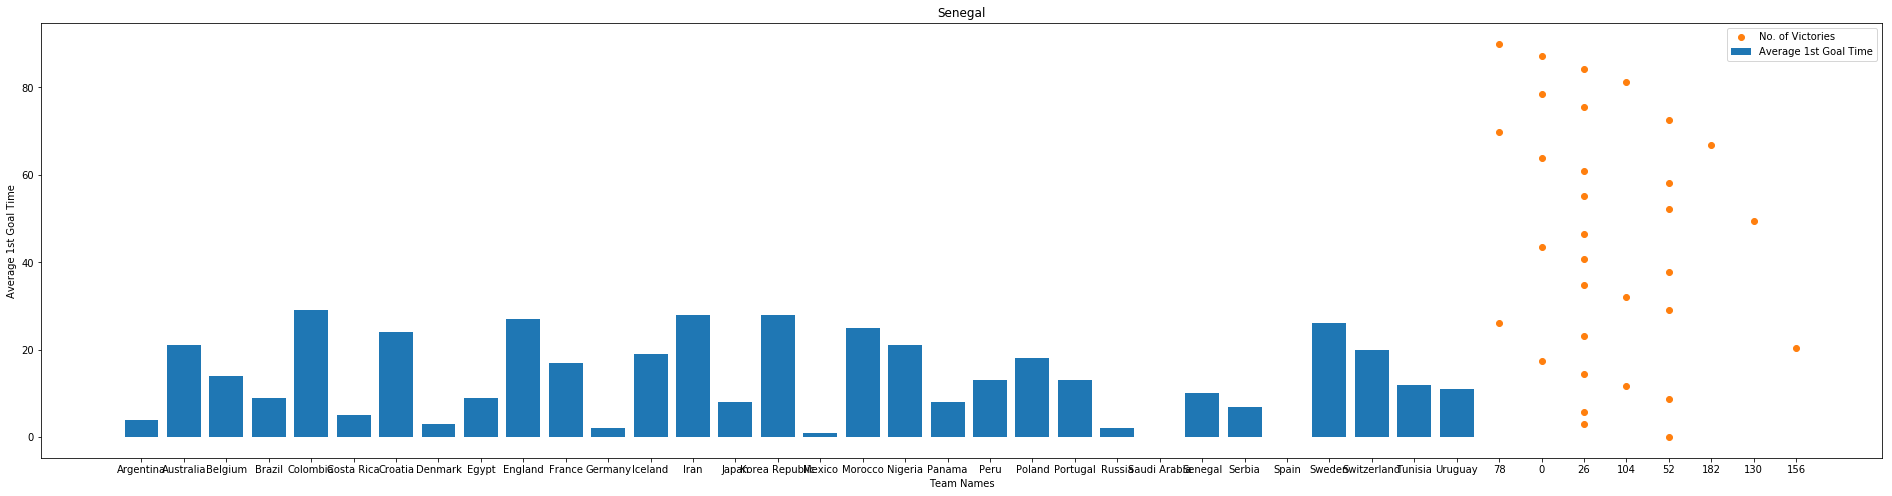

In [254]:
datax = np.array(world_cup_teams)
win = np.array(world_cup_teams)
i=0

for item in world_cup_teams:
    dataPlot = datasetFilled.where(datasetFilled['Team']==item).dropna()
    datax[i] = dataPlot["1st Goal"].mean()
    i=i+1
    dataPlot1 = dataPlot.where(dataPlot['Man of the Match']=="Yes").dropna()
    win[i-1] = dataPlot1.size
        
fig, ax = plt.subplots(figsize=(33,8))
y = np.linspace(90,0,32)
ax.bar(world_cup_teams,datax,label="Average 1st Goal Time")
#plt.yscale("linear")
ax.scatter(,win,label="No. of Victories")
plt.yscale("linear")
ax.legend()
plt.title(item)
ax.set_xlabel('Team Names')  
ax.set_ylabel('Average 1st Goal Time')